In [1]:
import glob 
import json
import numpy as np

from matplotlib import pyplot as plt

In [15]:
test_scores = []
logs = sorted(glob.glob('../logs_folder/*.json'))
for log_name in logs[:100]:
    log = json.load(open(log_name, 'r'))
    test_scores.append(np.mean(log['test_losses']))

/home/filatov/miniconda/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/filatov/miniconda/envs/py38/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [16]:
scores = {'zenas': [], 'gradnorm': []}
my_logs = sorted(glob.glob('../logs/*.json'))
for log_name in my_logs[:100]:
    log = json.load(open(log_name, 'r'))
    scores['zenas'].append(log['zenas'])
    scores['gradnorm'].append(log['gradnorm'])

In [17]:
zenas = np.array(scores['zenas'])
gradnorm = np.array(scores['gradnorm'])
test = np.array(test_scores)

In [18]:
zenas_ids = np.where(zenas > 0)[0]
test_ids = np.where(test > 0)[0]

ids = np.intersect1d(zenas_ids, test_ids)

In [19]:
zenas_filtered = zenas[ids]
gradnorm_filtered = gradnorm[ids]
test_filtered = test[ids]

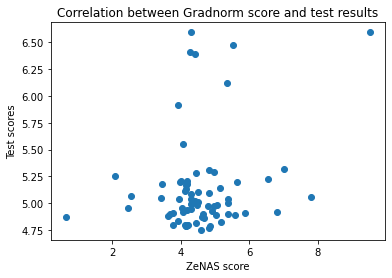

In [20]:
plt.scatter(zenas_filtered, test_filtered)
plt.title("Correlation between Gradnorm score and test results")
plt.ylabel("Test scores")
plt.xlabel("ZeNAS score")
plt.show()

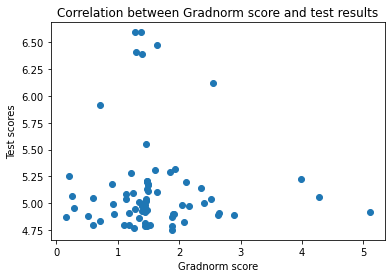

In [21]:
plt.scatter(gradnorm_filtered, test_filtered)
plt.title("Correlation between Gradnorm score and test results")
plt.ylabel("Test scores")
plt.xlabel("Gradnorm score")
plt.show()